### Masive Data Lab Activities

Description : Read and Cleaning Data
File        : iota_price.csv 
Name        : Yudi Aditya

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Bitcoin Cash Price

#### 1. Reading Data

In [7]:
# Read Bitcoin Cash Price
df1 = pd.read_csv('../data/raw/cryptocurrencypricehistory/iota_price.csv', parse_dates = ['Date'])
df1.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,0.544132,0.646085,0.468949,0.613085,"45,817,500","1,512,430,000"
1,2017-09-04,0.744257,0.744257,0.406795,0.566472,"74,601,300","2,068,680,000"
2,2017-09-03,0.698855,0.775863,0.672850,0.743968,"29,504,600","1,942,490,000"
3,2017-09-02,0.796560,0.802464,0.658006,0.695547,"39,333,900","2,214,060,000"
4,2017-09-01,0.842867,0.879100,0.768119,0.807778,"28,047,000","2,342,770,000"


In [3]:
type(df1.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
# Set Date as it's index
df1.set_index('Date', inplace = True )

In [9]:
# Get General Information regarding data frame
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2017-09-05 to 2017-06-13
Data columns (total 6 columns):
Open          85 non-null float64
High          85 non-null float64
Low           85 non-null float64
Close         85 non-null float64
Volume        85 non-null object
Market Cap    85 non-null object
dtypes: float64(4), object(2)
memory usage: 4.6+ KB


- The data frame has 85 entries and 6 columns. 
- All columns has 85 elements, probably there's no missing data. Especially for Open, high, Low, and Close. To make it sure, We'll see for this
- Volume and Market Cap's data type are an object, it should be number.

In [10]:
# Replace missing data as NaN
df1.replace('-', np.nan,inplace=True)
# Count missing data
df1.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

#### 2. Cleaning Data Part (Deal with Wrong Format)

Problem :
- Some data has different format, therefore Volume and Market Cap recognize as a string, not a number.

Solution:
- Convert to float number

In [11]:
print('Volume Data Type :', type(df1.Volume[0]))
print('Market Cap Data Type :', type(df1['Market Cap'][0]))

Volume Data Type : <class 'str'>
Market Cap Data Type : <class 'str'>


In [12]:
#convert data to number
def convert_to_number(x):
    try:
        return int(x.replace(',',''))
    except:
        return x

df1.Volume = df1.Volume.apply(convert_to_number)
df1['Market Cap'] = df1['Market Cap'].apply(convert_to_number)

df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2017-09-05 to 2017-06-13
Data columns (total 6 columns):
Open          85 non-null float64
High          85 non-null float64
Low           85 non-null float64
Close         85 non-null float64
Volume        85 non-null int64
Market Cap    85 non-null int64
dtypes: float64(4), int64(2)
memory usage: 7.1 KB


In [13]:
df1.describe()

,Open,High,Low,Close,Volume,Market Cap
count,85.000000,85.000000,85.000000,85.000000,8.500000e+01,8.500000e+01
mean,0.501695,0.537700,0.455827,0.502194,1.589207e+07,1.394773e+09
std,0.254753,0.267625,0.232656,0.256240,1.749176e+07,7.087087e+08
min,0.157961,0.176099,0.147933,0.158688,2.334640e+06,4.390570e+08
25%,0.286164,0.304476,0.262736,0.284565,3.913220e+06,7.954020e+08
50%,0.413371,0.437340,0.388231,0.410757,8.233640e+06,1.148980e+09
75%,0.722169,0.775863,0.658006,0.721535,2.035800e+07,2.007290e+09
max,1.040000,1.100000,0.998241,1.050000,8.469830e+07,2.904020e+09


#### 3. Data Visualization

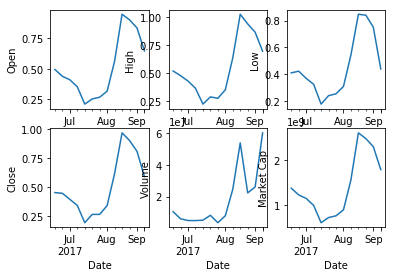

In [15]:
# Visualization the average of Open based on time (Week)
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df1.Open.resample('W').mean().plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df1.High.resample('W').mean().plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df1.Low.resample('W').mean().plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df1.Close.resample('W').mean().plot()

plt.subplot(2,3,5)
plt.ylabel('Volume')
df1.Volume.resample('W').mean().plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap')
df1['Market Cap'].resample('W').mean().plot()